In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
if df['id'].nunique() == len(df):
    print('Значения в столбце id являются уникальными')
else:
    print('Значения в столбце id не являются уникальными')

Значения в столбце id являются уникальными


In [4]:
data = df
# Создание столбца дат на основе идентификатора временного ряда и номера дня
data['date'] = pd.to_datetime((data['id'] - 1) * 90 + data.groupby('id').cumcount(), origin='2022-01-01')

# Извлечение дня недели из столбца дат и создание нового столбца 'weekday'
data['weekday'] = data['date'].dt.weekday

In [5]:
data.head()

,id,day 1,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,...,day 83,day 84,day 85,day 86,day 87,day 88,day 89,day 90,date,weekday
0,6602185159948,569369144437,152818843344,-15490421929,-406624212,800362695678,2306966308406,1917859437929,1075925676467,277630770065,...,1668473296482,-55911238122,1105906678699,1134120612066,-26829699967,-19492512239,1850461161279,-1781621104800,2022-01-07 21:03:16.664395230,4
1,1663310387493,-104722473995,-29275417695,423353969042,416864670779,-323866168258,-59323097843,58355171506,250838843414,-184607036341,...,-13050008306,1122739774405,-358972410001,-294465761456,289760186052,588830896355,-21661542192,-153747680862,2022-01-02 17:34:57.934874280,6
2,3604676372924,-42697753432,154940888256,5290701628,2915610080,-241412656598,-2172755647,-60115526657,99210264232,281086593365,...,172520154368,46099833867,-297776587790,200380940252,153279754373,42773997259,5607112117,4789271560371,2022-01-04 18:07:00.873563070,1
3,3517792576177,735945593435,877636042341,-5241075542,-1817826687,1008399822616,996548931508,471592893006,479393037398,246618026800,...,808871471815,-8997018250,627399608353,223093070252,-25844611162,-9955925825,603978495789,366344015281,2022-01-04 15:56:41.331855840,1
4,6892195368446,697850269572,980815916948,-11470196952,-21103754202,1207799272628,1202816134496,559646086486,1058635690664,122661998719,...,728437869463,13477840270,1455297859610,409612399843,-6730004331,19193466540,1163355637082,-138405088616,2022-01-08 04:18:17.583160050,5


In [9]:
data.tail()

,id,day 1,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,...,day 83,day 84,day 85,day 86,day 87,day 88,day 89,day 90,date,weekday
19995,6120398522001,-24628787635,267495848867,-12230119509,-679136157,-187955674883,4597158234,-2418401538,9854043544,-14559914953,...,-39577541831,-18068542326,105241442152,-59936288497,-26435699898,-1400118718,250752357103,818156843427,2022-01-07 09:00:35.866980000,4
19996,3883376591531,23385081422,-15228303151,-8918281087,-7772984843,-7543131908,123891713099,-81767137062,62477678253,44174672734,...,79682589968,-26953658290,53427137426,59564486558,-20909395485,-15970211056,223711674873,-815055027,2022-01-05 01:05:03.893237700,2
19997,8492364329502,-17572384426,215467299511,-9758708941,-3626522770,-182333216840,70907176369,-16418782963,-1289752268,299779480157,...,266432384316,-36450926686,-7151728550,185309970484,59247462995,-17951159898,-66380991478,3395054610973,2022-01-09 20:18:32.789655090,6
19998,4485476161662,-34373226151,-123943635780,2186315945,1323094644,44423732764,67484356011,-29553565822,66448231612,-3151812187,...,-38862536845,49943281842,-70544749716,106782921385,51233576000,43731331086,-3692332109,-89024228031,2022-01-05 16:08:12.854549490,2
19999,3215236198738,-23217868277,-83183293656,-17290978783,-20704607579,57063231086,-8518888768,-8843909327,140494150914,-94676359319,...,96004057019,-15762923260,-139203862890,17091756159,-33970504187,-738988979,117194010253,-7089708905,2022-01-04 08:22:51.257886330,1


# Проверить размер и структуру данных

In [4]:
df.shape

(20000, 91)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      20000 non-null  int64
 1   day 1   20000 non-null  int64
 2   day 2   20000 non-null  int64
 3   day 3   20000 non-null  int64
 4   day 4   20000 non-null  int64
 5   day 5   20000 non-null  int64
 6   day 6   20000 non-null  int64
 7   day 7   20000 non-null  int64
 8   day 8   20000 non-null  int64
 9   day 9   20000 non-null  int64
 10  day 10  20000 non-null  int64
 11  day 11  20000 non-null  int64
 12  day 12  20000 non-null  int64
 13  day 13  20000 non-null  int64
 14  day 14  20000 non-null  int64
 15  day 15  20000 non-null  int64
 16  day 16  20000 non-null  int64
 17  day 17  20000 non-null  int64
 18  day 18  20000 non-null  int64
 19  day 19  20000 non-null  int64
 20  day 20  20000 non-null  int64
 21  day 21  20000 non-null  int64
 22  day 22  20000 non-null  int64
 23  day 23  200

In [6]:
df.head()

,id,day 1,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,...,day 81,day 82,day 83,day 84,day 85,day 86,day 87,day 88,day 89,day 90
0,6602185159948,569369144437,152818843344,-15490421929,-406624212,800362695678,2306966308406,1917859437929,1075925676467,277630770065,...,-23536698564,1524999469315,1668473296482,-55911238122,1105906678699,1134120612066,-26829699967,-19492512239,1850461161279,-1781621104800
1,1663310387493,-104722473995,-29275417695,423353969042,416864670779,-323866168258,-59323097843,58355171506,250838843414,-184607036341,...,529867756317,-245569015020,-13050008306,1122739774405,-358972410001,-294465761456,289760186052,588830896355,-21661542192,-153747680862
2,3604676372924,-42697753432,154940888256,5290701628,2915610080,-241412656598,-2172755647,-60115526657,99210264232,281086593365,...,32773187167,-347787851371,172520154368,46099833867,-297776587790,200380940252,153279754373,42773997259,5607112117,4789271560371
3,3517792576177,735945593435,877636042341,-5241075542,-1817826687,1008399822616,996548931508,471592893006,479393037398,246618026800,...,4227540489,855279732927,808871471815,-8997018250,627399608353,223093070252,-25844611162,-9955925825,603978495789,366344015281
4,6892195368446,697850269572,980815916948,-11470196952,-21103754202,1207799272628,1202816134496,559646086486,1058635690664,122661998719,...,-17229675906,940502608045,728437869463,13477840270,1455297859610,409612399843,-6730004331,19193466540,1163355637082,-138405088616


In [7]:
df.tail()

,id,day 1,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,...,day 81,day 82,day 83,day 84,day 85,day 86,day 87,day 88,day 89,day 90
19995,6120398522001,-24628787635,267495848867,-12230119509,-679136157,-187955674883,4597158234,-2418401538,9854043544,-14559914953,...,-7158916464,204729538824,-39577541831,-18068542326,105241442152,-59936288497,-26435699898,-1400118718,250752357103,818156843427
19996,3883376591531,23385081422,-15228303151,-8918281087,-7772984843,-7543131908,123891713099,-81767137062,62477678253,44174672734,...,-7626731747,157231720804,79682589968,-26953658290,53427137426,59564486558,-20909395485,-15970211056,223711674873,-815055027
19997,8492364329502,-17572384426,215467299511,-9758708941,-3626522770,-182333216840,70907176369,-16418782963,-1289752268,299779480157,...,-17792945695,-336100103876,266432384316,-36450926686,-7151728550,185309970484,59247462995,-17951159898,-66380991478,3395054610973
19998,4485476161662,-34373226151,-123943635780,2186315945,1323094644,44423732764,67484356011,-29553565822,66448231612,-3151812187,...,29253821343,186004596897,-38862536845,49943281842,-70544749716,106782921385,51233576000,43731331086,-3692332109,-89024228031
19999,3215236198738,-23217868277,-83183293656,-17290978783,-20704607579,57063231086,-8518888768,-8843909327,140494150914,-94676359319,...,-19431853252,446803713691,96004057019,-15762923260,-139203862890,17091756159,-33970504187,-738988979,117194010253,-7089708905


In [8]:
df['id'].nunique()

20000

# Проверить наличие пропущенных значений:

In [7]:
df.isnull().sum()

id        0
day 1     0
day 2     0
day 3     0
day 4     0
         ..
day 86    0
day 87    0
day 88    0
day 89    0
day 90    0
Length: 91, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      20000 non-null  int64
 1   day 1   20000 non-null  int64
 2   day 2   20000 non-null  int64
 3   day 3   20000 non-null  int64
 4   day 4   20000 non-null  int64
 5   day 5   20000 non-null  int64
 6   day 6   20000 non-null  int64
 7   day 7   20000 non-null  int64
 8   day 8   20000 non-null  int64
 9   day 9   20000 non-null  int64
 10  day 10  20000 non-null  int64
 11  day 11  20000 non-null  int64
 12  day 12  20000 non-null  int64
 13  day 13  20000 non-null  int64
 14  day 14  20000 non-null  int64
 15  day 15  20000 non-null  int64
 16  day 16  20000 non-null  int64
 17  day 17  20000 non-null  int64
 18  day 18  20000 non-null  int64
 19  day 19  20000 non-null  int64
 20  day 20  20000 non-null  int64
 21  day 21  20000 non-null  int64
 22  day 22  20000 non-null  int64
 23  day 23  200

# Проверить распределение данных:

In [9]:
df.describe()

,id,day 1,day 2,day 3,day 4,day 5,day 6,day 7,day 8,day 9,...,day 81,day 82,day 83,day 84,day 85,day 86,day 87,day 88,day 89,day 90
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,5.494354e+12,2.282123e+11,2.378079e+11,8.572424e+10,7.214647e+10,2.988278e+11,7.168783e+11,4.636691e+11,4.666558e+11,1.251322e+11,...,9.342258e+10,4.510124e+11,5.527139e+11,2.217037e+11,3.113546e+11,3.426143e+11,8.385888e+10,1.109105e+11,5.318376e+11,5.134597e+11
std,2.593609e+12,3.627667e+11,4.108434e+11,1.588782e+11,1.445884e+11,6.004776e+11,9.892644e+11,7.388921e+11,4.719452e+11,2.265261e+11,...,1.605635e+11,5.761702e+11,7.367581e+11,4.676823e+11,6.180076e+11,5.128531e+11,1.663870e+11,1.894651e+11,6.767620e+11,1.713080e+12
min,1.000432e+12,-2.915243e+11,-4.800125e+11,-1.132415e+11,-5.010705e+10,-1.371336e+12,-1.493738e+11,-1.706423e+11,-1.061468e+11,-3.812032e+11,...,-5.854804e+10,-1.174855e+12,-5.637338e+11,-2.083258e+11,-1.484217e+12,-4.611216e+11,-2.669900e+11,-5.833574e+10,-9.780054e+11,-3.904884e+12
25%,3.249801e+12,-2.575671e+10,-4.208065e+10,-1.602493e+10,-1.391726e+10,-8.599532e+10,3.946376e+10,-4.291059e+09,9.270927e+10,-4.109306e+10,...,-1.188609e+10,-5.992345e+08,-1.086944e+09,-2.670736e+10,-6.307719e+10,-8.559984e+09,-1.754732e+10,-8.937754e+09,3.463707e+10,-1.384012e+11
50%,5.479047e+12,9.256936e+09,4.182708e+10,-2.490618e+09,-2.677633e+09,7.160954e+10,1.209630e+11,4.978491e+10,2.708810e+11,5.142664e+10,...,9.587882e+09,2.907892e+11,1.975006e+11,-3.328725e+09,7.110147e+10,1.402068e+11,4.229509e+10,2.487703e+10,3.052436e+11,-7.170507e+09
75%,7.750750e+12,5.159459e+11,3.485921e+11,1.611724e+11,5.929736e+10,7.646664e+11,1.065424e+12,4.896506e+11,6.314943e+11,2.610125e+11,...,1.025128e+11,8.359106e+11,8.860246e+11,7.140067e+10,7.306606e+11,4.308887e+11,1.377608e+11,9.898458e+10,8.294926e+11,7.414480e+11
max,9.999907e+12,1.540484e+12,1.839759e+12,6.163161e+11,4.920474e+11,2.642709e+12,3.791900e+12,2.613850e+12,2.200683e+12,1.143455e+12,...,6.232425e+11,2.688169e+12,3.104867e+12,1.458098e+12,2.760473e+12,2.167746e+12,7.194531e+11,7.079616e+11,2.931575e+12,5.598485e+12


<Axes: ylabel='Count'>

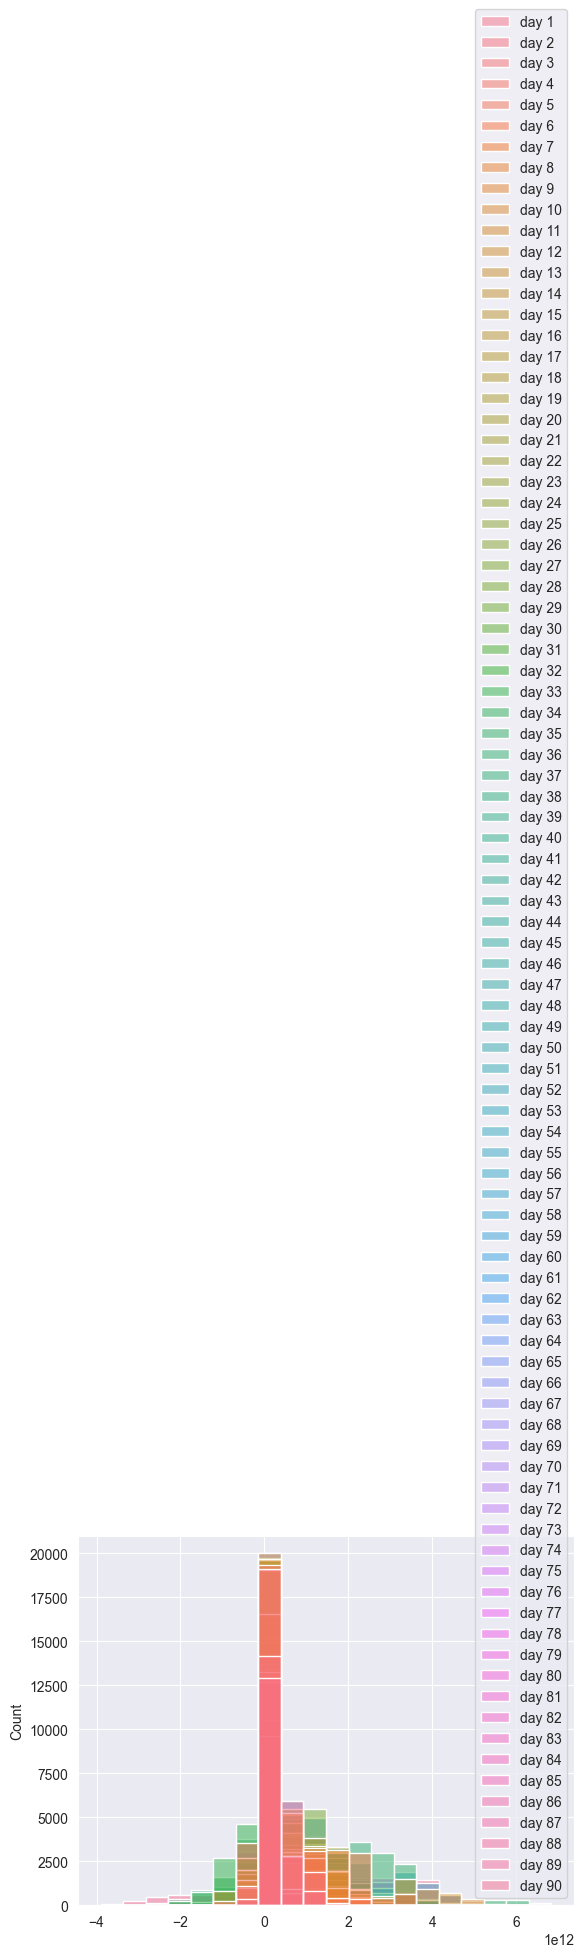

In [10]:
sns.histplot(data=df.iloc[:, 1:], bins=20)

# Исследовать корреляцию между переменными:

<Axes: >

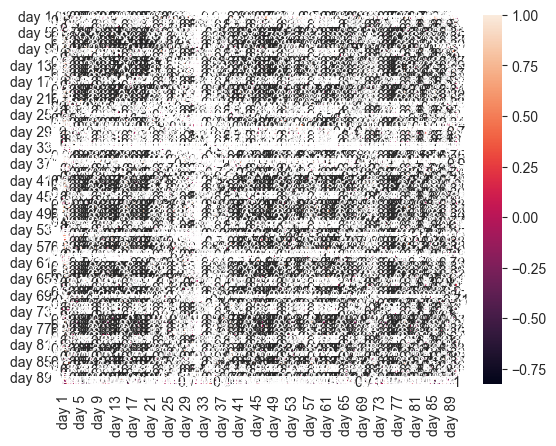

In [11]:
corr_matrix = df.iloc[:, 1:].corr()
sns.heatmap(corr_matrix, annot=True)

# Исследовать тренд и сезонность временных рядов:

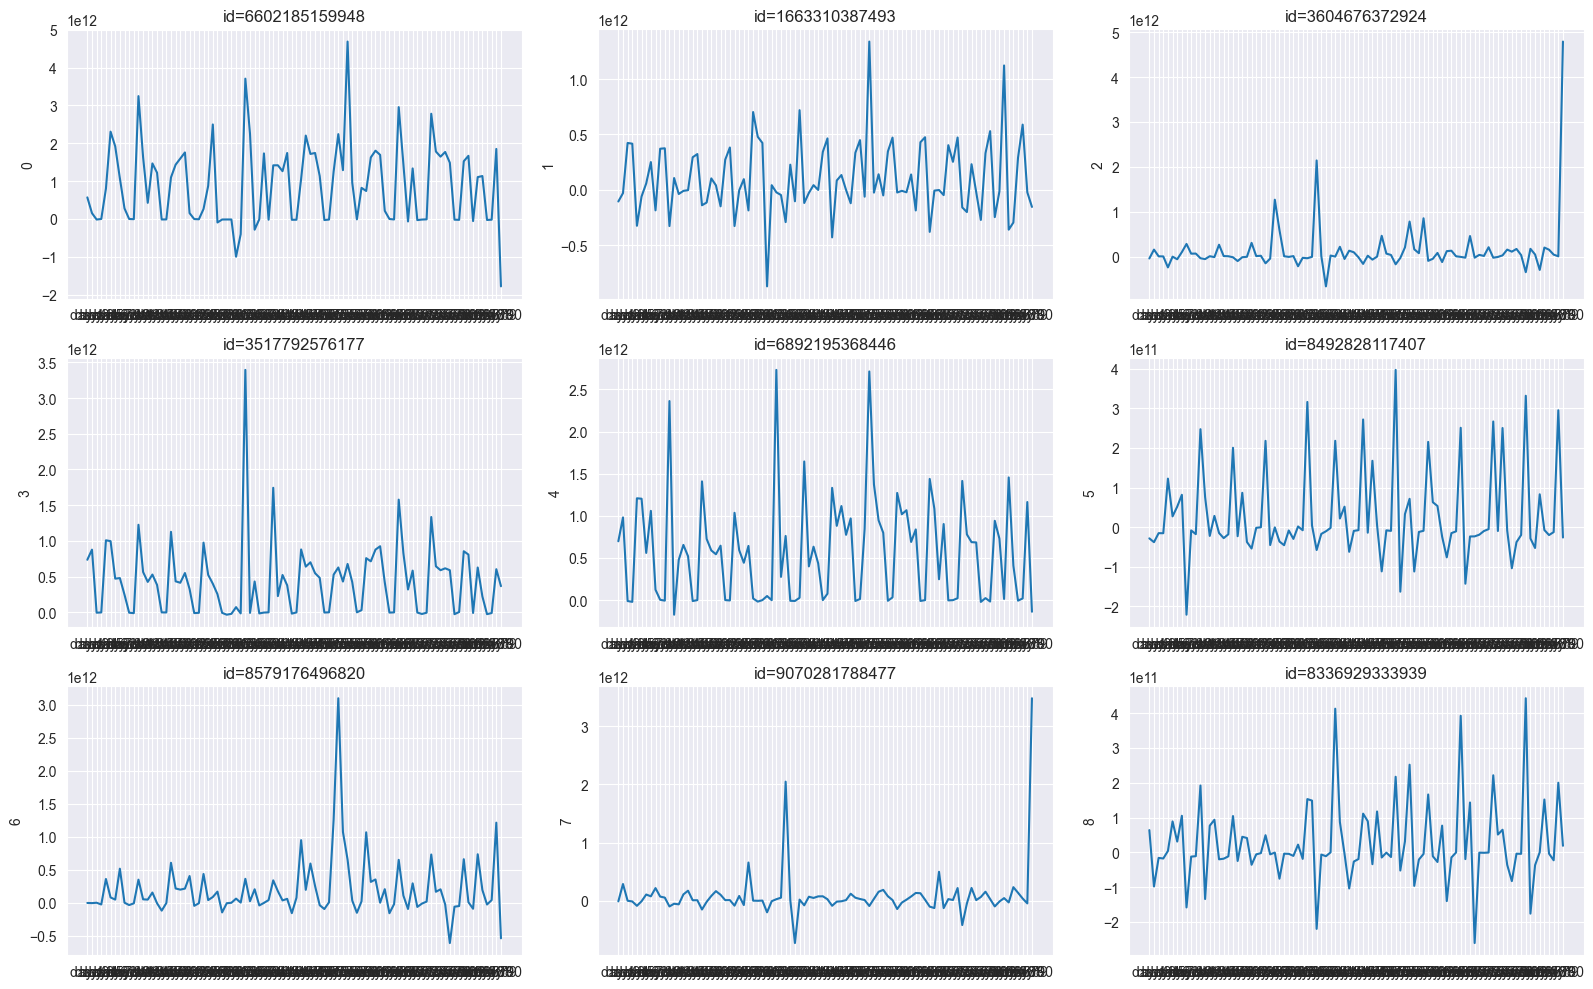

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    sns.lineplot(data=df.iloc[i, 1:], ax=ax)
    ax.set_title(f"id={df.iloc[i, 0]}")

plt.tight_layout()


# Проверить наличие выбросов:

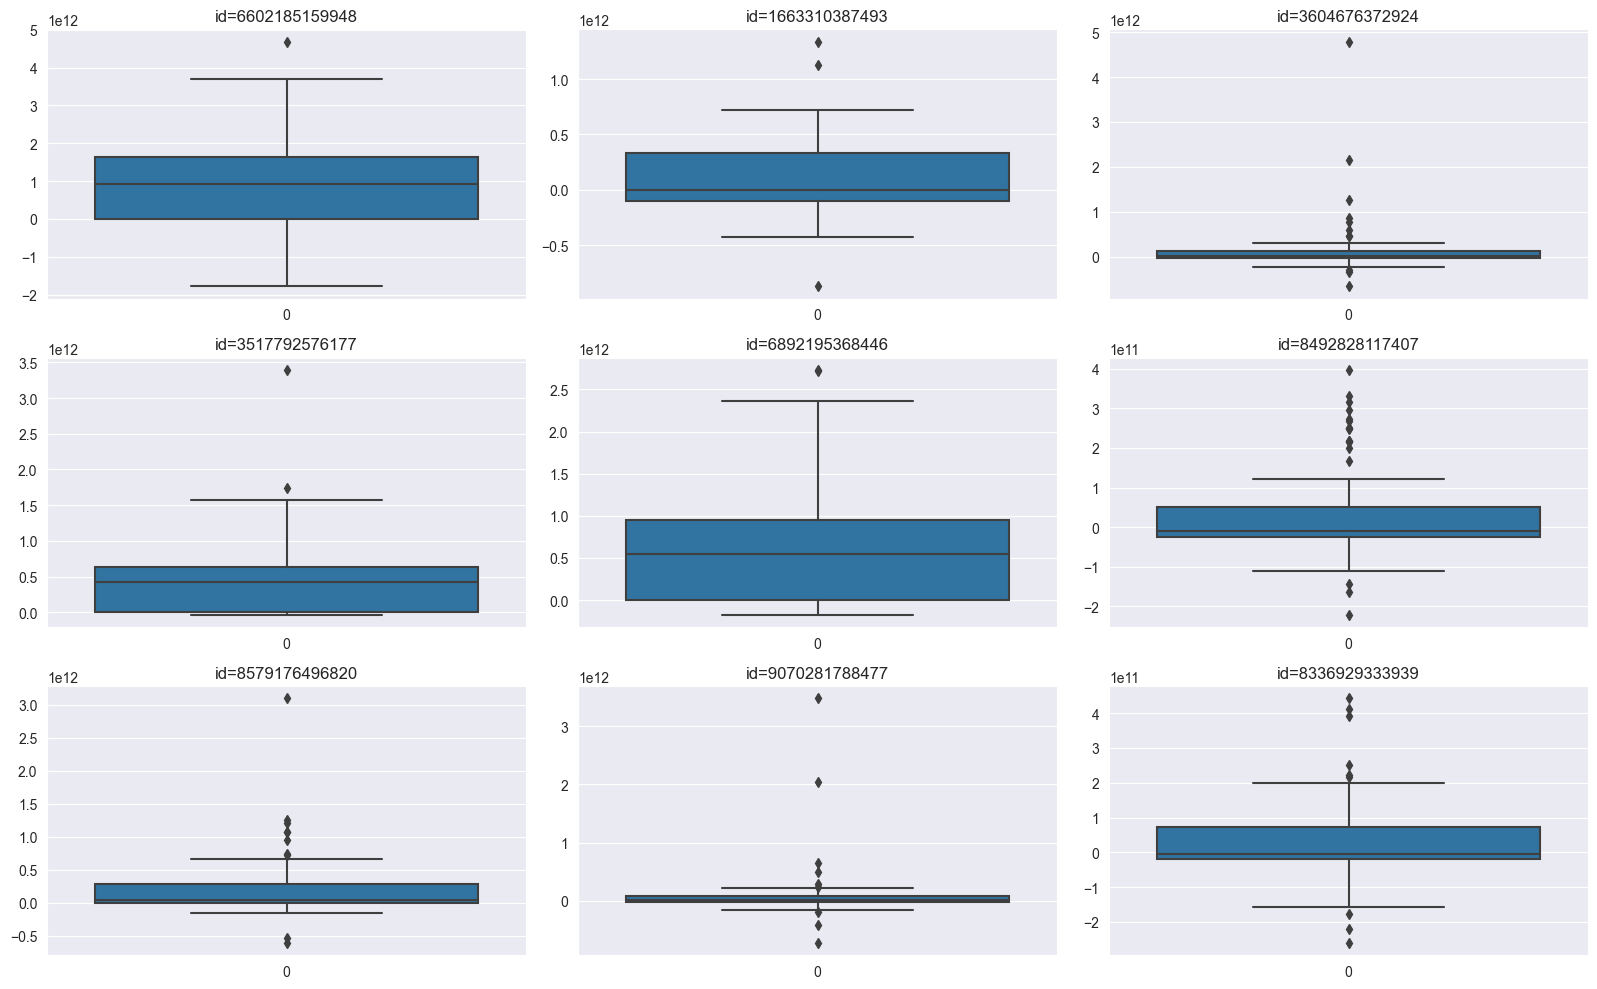

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    sns.boxplot(data=df.iloc[i, 1:], ax=ax)
    ax.set_title(f"id={df.iloc[i, 0]}")

plt.tight_layout()


# Проверить распределение данных для каждого дня временного ряда:

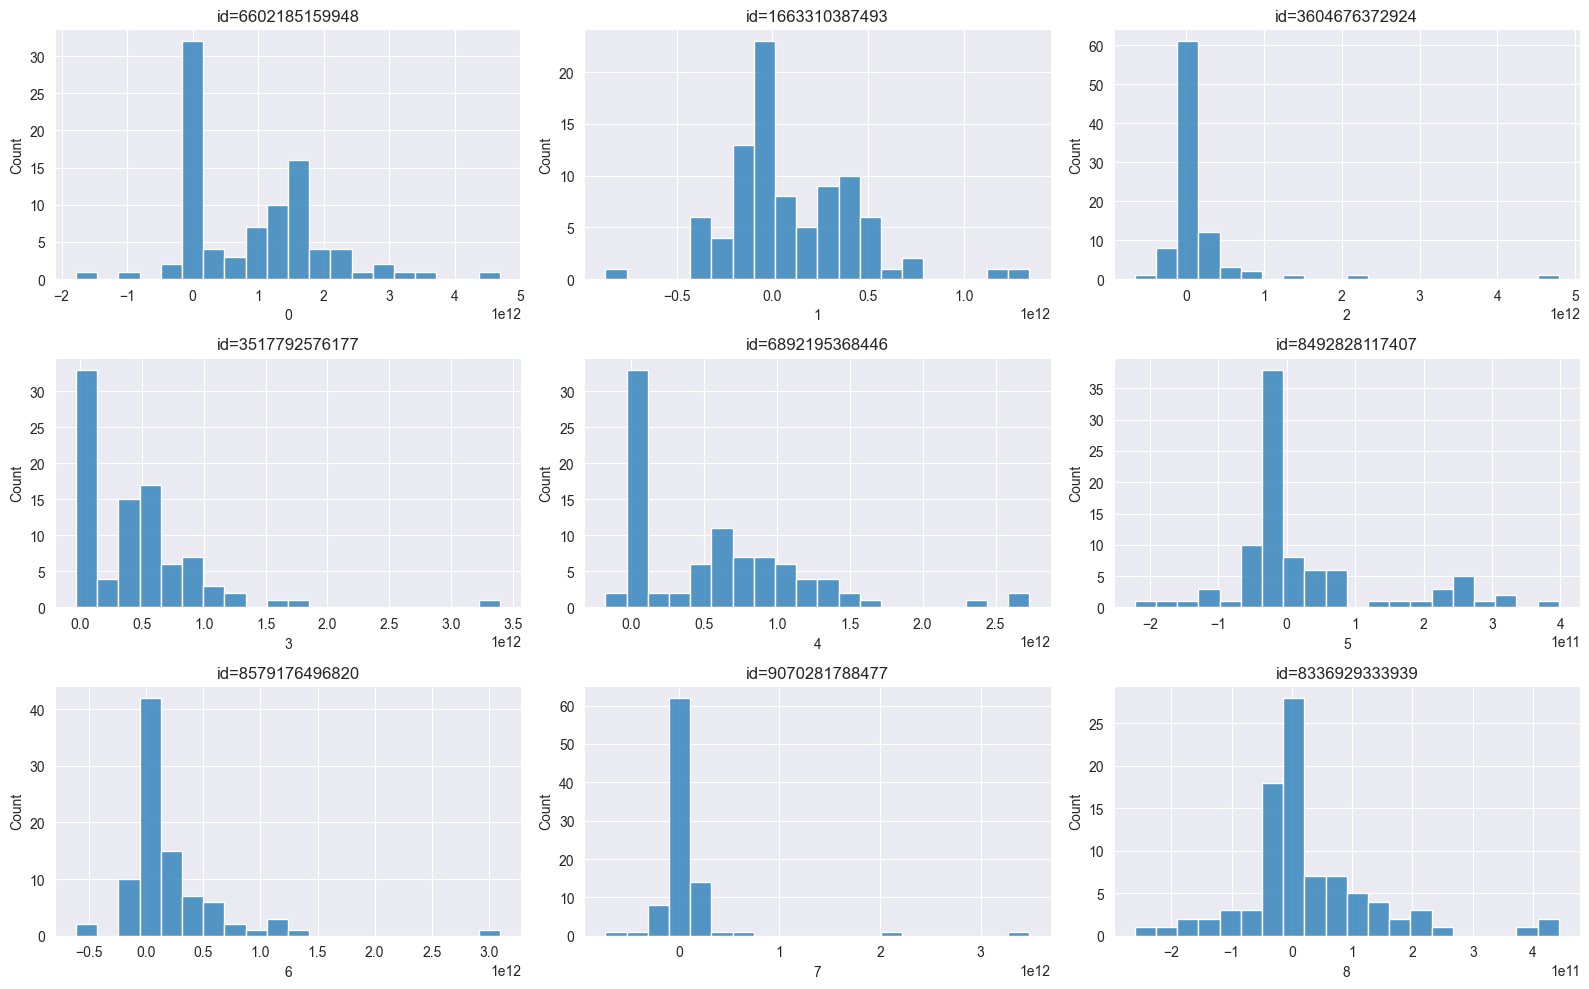

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    sns.histplot(data=df.iloc[i, 1:], ax=ax, bins=20)
    ax.set_title(f"id={df.iloc[i, 0]}")

plt.tight_layout()
